<a href="https://colab.research.google.com/github/joananana/DSP2/blob/main/DSP2_T%C3%B3pico_4_Media_movel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.signal import lfilter, freqz
import matplotlib.pyplot as plt

# Média Móvel

A. No Python (Numpy/Scipy), implemente com a função `scipy.signal.lfilter` um sistema média móvel de duas amostras. Considere a entrada $x=[10, 3, -3, 3, 8, 1, -2]$

Saída após o filtro de média móvel de duas amostras:
[ 5.   6.5  0.   0.   5.5  4.5 -0.5]


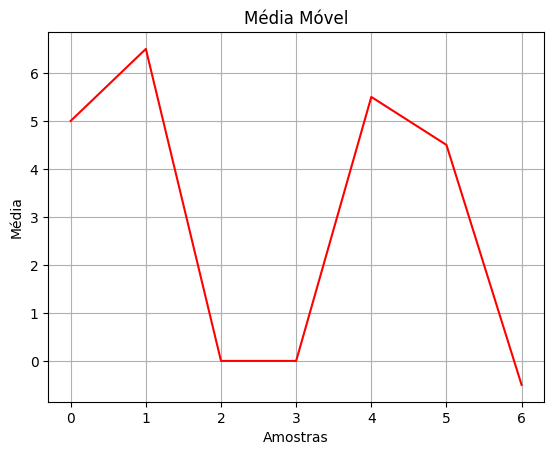

In [2]:
# Defina a entrada x
x = np.array([10, 3, -3, 3, 8, 1, -2])

# Coeficientes do filtro de média móvel de duas amostras
b = np.array([0.5, 0.5])
a = 1

# Aplicar o filtro
y = lfilter(b, a, x)

print("Saída após o filtro de média móvel de duas amostras:")
print(y)
plt.plot(y, 'r')
plt.title('Média Móvel')
plt.xlabel('Amostras')
plt.ylabel('Média')
plt.grid(True)
plt.show()

B. Verifique se a saída está correta (faça o cálculo manualmente). Foi por esse motivo que usamos um sinal $x(n)$ simples, para calcular a saída manualmente e ter certeza que a implementação está correta.

(10 + 3) / 2 = 6.5

(3 + (-3)) / 2 = 0

(-3 + 3) / 2 = 0

(3 + 8) / 2 = 5.5

(8 + 1) / 2 = 4.5

(1 + (-2)) / 2 = -0.5

Então, a média móvel de duas amostras para o conjunto é [6.5, 0, 0, 5.5, 4.5, -0.5].

C. Verifique com a função `scipy.signal.freqz` a resposta em frequência do sistema. Que tipo de filtro é o sistema média móvel?
Qual a sua frequência de corte, em Hz, considerando uma frequência de amostragem de 44100 Hz?

Confira se o resultado está correto fazendo também de forma analítica. Anexe uma foto com seu cálculo. Para isso, lembre que a frequência de corte de um filtro é aquela em que a magnitude de $H(z)$ é $1 \over \sqrt 2$. Você já tem a resposta em frequência (olhe no vídeo). Obtenha a magnitude, depois iguale a $1 \over \sqrt 2$ e isole a frequência.

**Joana**: Tipo de Filtro: O sistema de média móvel é um filtro FIR (Filtro de Resposta ao Impulso Finito). Isso significa que ele possui uma resposta ao impulso finita, ou seja, sua saída depende apenas das entradas passadas e não possui realimentação.

Frequência de Corte: A frequência de corte de um filtro FIR é determinada pelo comprimento do filtro (número de coeficientes). No caso do sistema de média móvel de duas amostras, temos dois coeficientes (0.5 e 0.5). A frequência de corte é aproximadamente metade da frequência de amostragem. Portanto, considerando uma frequência de amostragem de 44100 Hz a frequência de corte do sistema de média móvel é de 22050 Hz.

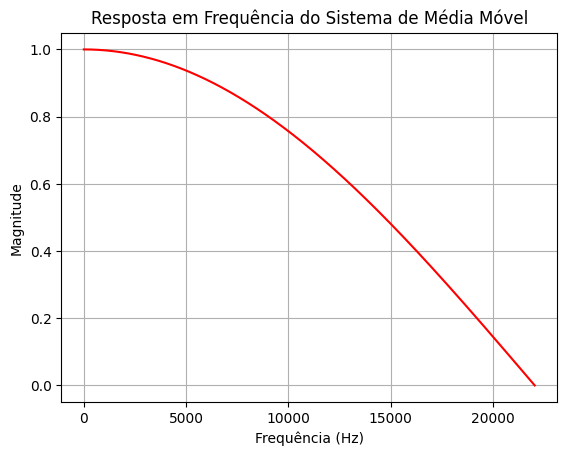

In [3]:
# Frequência de amostragem
fs = 44100

# Calcular a resposta em frequência
w, h = freqz(b, a, worN=8000)

# Converter frequência angular para frequência em Hz
frequencies = w * fs / (2 * np.pi)

# Plot da magnitude da resposta em frequência
plt.plot(frequencies, np.abs(h), 'r')
plt.title('Resposta em Frequência do Sistema de Média Móvel')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

D. Um tom senoidal puro de 17 kHz, amplitude de pico de 1,5 V, amostrado a 44,1 kHz, é aplicado à entrada do sistema média móvel de 2 amostras. Qual o sinal de saída (tipo, frequência e amplitude)? Mostre.

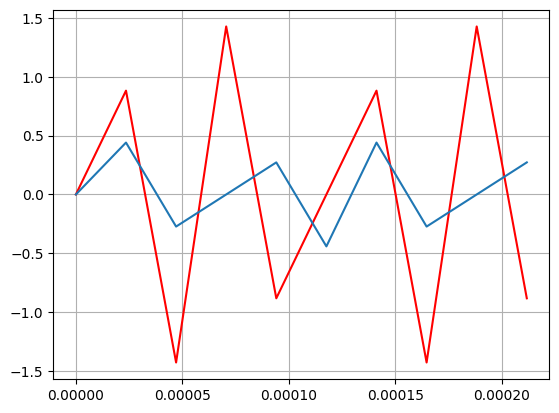

In [6]:
def tonegen(frequencia, duracao, amplitude, taxa_amostragem):
    # Cria um array de tempo com base na duração e na taxa de amostragem
    t = np.linspace(0, duracao, int(taxa_amostragem * duracao), False)
    # Gera o tom senoidal
    y = amplitude * np.sin(frequencia * 2 * np.pi * t)
    return t, y

t, y = tonegen(17000, 4/17000, 1.5, 44100)
plt.plot(t, y, 'r')

y_filtrado = lfilter(b, a, y)
plt.plot(t, y_filtrado)
plt.grid(True)
plt.show()



E. Com `zplane` (baixar de https://www.dsprelated.com/showcode/244.php), onde estão localizadas as singularidades (polos e zeros) no domínio Z do sistema média móvel de 2 amostras?

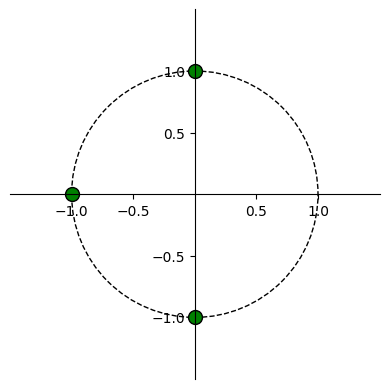

(array([-1.00000000e+00+0.j, -7.77156117e-16+1.j, -7.77156117e-16-1.j]),
 array([], dtype=float64),
 1.0)

In [11]:
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams

def zplane(b,a,filename=None):
    """Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1

    # Get the poles and zeros
    #p = np.roots(np.array([a]))
    p = np.roots(a)
    z = np.roots(b)

    k = kn/float(kd)

    # Plot the zeros and set marker properties
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)


    return z, p, k


# Coeficientes do filtro de média móvel de duas amostras

zplane( b, np.array([1]))

F. Ainda no Python, implemente uma média móvel com quatro amostras. Há um efeito de suavização na saída?

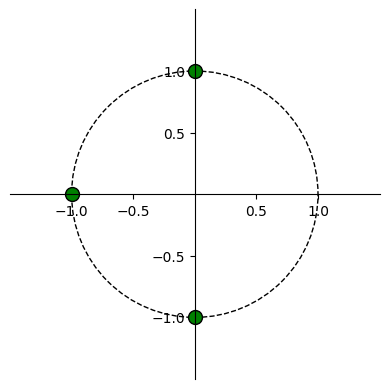

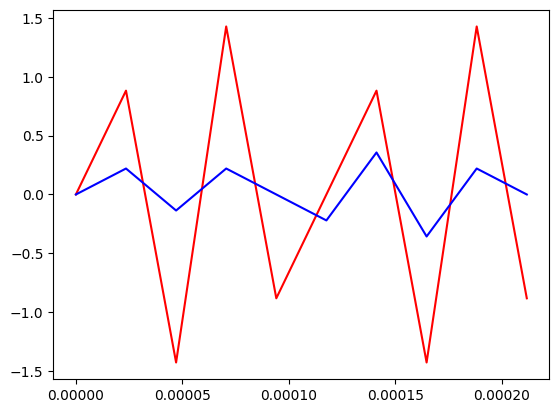

In [15]:
# Coeficientes do filtro
n = 4 # Número de amostras & média móvel
b = np.ones(n) / n

zplane( b, np.array([1]))

t,y = tonegen(17000, 4/17000, 1.5, fs)
# Aplicando o filtro
y_filtrado = lfilter(b, 1, y)

plt.plot(t,y, 'r')
plt.plot(t,y_filtrado, 'b')
plt.show()

G. Verifique a resposta em frequência do sistema com `freqz`. Qual a diferença em relação ao sistema de 2 amostras?

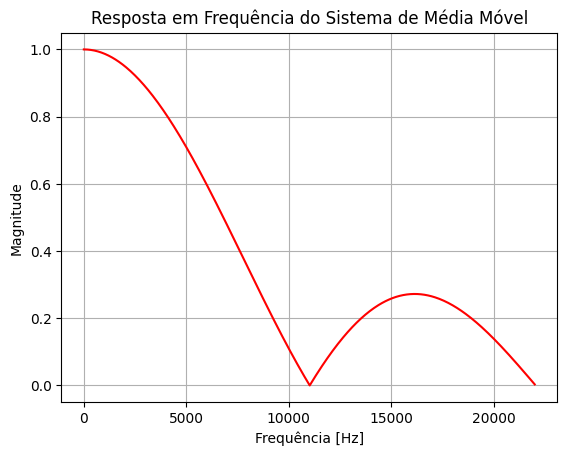

In [18]:
fs = 44100
freq_Nyq = fs/2

w, H = freqz(b, 1)
# Converter frequência angular para frequência em Hz
frequencies = w * fs / (2 * np.pi)
plt.plot(frequencies, abs(H), 'r')

plt.title('Resposta em Frequência do Sistema de Média Móvel')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Magnitude')
plt.grid()
plt.show()